In [7]:
import numpy as np

import matplotlib.pyplot as plt

#Generate a noisy, slightly quadratic dataset

x = np.arange(100)
y = 150 + 3*x + 0.03*x**2 + 5*np.random.randn(len(x))

# Create the Design Matrices for the linear, quadratic, and cubic fit

M1 = np.vstack( (np.ones_like(x), x) ).T
M2 = np.vstack( (np.ones_like(x), x, x**2) ).T
M3 = np.vstack( (np.ones_like(x), x, x**2, x**3) ).T

# an equivalent alternative solution with statsmodels would be 
# M1 = sm.add_constant(x)

# Solve the equations
p1 = np.linalg.lstsq(M1, y)
p2 = np.linalg.lstsq(M2, y)
p3 = np.linalg.lstsq(M3, y)

np.set_printoptions(precision=3)
print('The coefficients from the linear fit: {0}'.format(p1[0]))

The coefficients from the linear fit: [101.62    5.973]


C:\Users\SAGAR\AppData\Local\Temp\ipykernel_11216\298740943.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p1 = np.linalg.lstsq(M1, y)
C:\Users\SAGAR\AppData\Local\Temp\ipykernel_11216\298740943.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p2 = np.linalg.lstsq(M2, y)
C:\Users\SAGAR\AppData\Local\Temp\ipykernel_11216\298740943.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default a

In [8]:

print('The coefficients from the quadratic fit: {0}'.format(p2[0]))


The coefficients from the quadratic fit: [1.498e+02 3.023e+00 2.980e-02]


In [9]:
print('The coefficients from the cubic fit: {0}'.format(p3[0]))

The coefficients from the cubic fit: [ 1.502e+02  2.976e+00  3.098e-02 -7.948e-06]


In [10]:
'''Solution with the tools from statsmodels'''
import statsmodels.api as sm

Res1 = sm.OLS(y, M1).fit()
Res2 = sm.OLS(y, M2).fit()
Res3 = sm.OLS(y, M3).fit()

print(Res1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.983   
Dependent Variable: y                AIC:                911.9236
Date:               2022-09-15 10:05 BIC:                917.1340
No. Observations:   100              Log-Likelihood:     -453.96 
Df Model:           1                F-statistic:        5673.   
Df Residuals:       98               Prob (F-statistic): 1.51e-88
R-squared:          0.983            Scale:              524.04  
-------------------------------------------------------------------
         Coef.     Std.Err.      t      P>|t|     [0.025    0.975] 
-------------------------------------------------------------------
const   101.6202     4.5442   22.3624   0.0000   92.6023   110.6381
x1        5.9731     0.0793   75.3193   0.0000    5.8157     6.1305
-----------------------------------------------------------------
Omnibus:               12.824       Durbin-Watson:          0.091
Prob(Omnibus):   

In [16]:
print('The AIC-value is {0:4.1f} for the linear fit,\n {1:4.1f} for the quadratic fit, and \n {2:4.1f} for the cubic fit'.format(Res1.aic, Res2.aic,
Res3.aic))

The AIC-value is 911.9 for the linear fit,
 591.7 for the quadratic fit, and 
 593.6 for the cubic fit


In [18]:
'''Formula-based modeling '''
import pandas as pd
import statsmodels.formula.api as smf

# Turn the data into a pandas DataFrame, so that we
# can address them in the formulas with their name
df = pd.DataFrame({'x':x, 'y':y})

# Fit the models, and show the results
Res1F = smf.ols('y~x', df).fit()
Res2F = smf.ols('y ~ x+I(x**2)', df).fit()
Res3F = smf.ols('y ~ x+I(x**2)+I(x**3)', df).fit()

#As example, display parameters for the quadratic fit
Res2F.params

Intercept    149.805636
x              3.022968
I(x ** 2)      0.029799
dtype: float64

In [19]:
Res2F.bse

Intercept    1.351084
x            0.063074
I(x ** 2)    0.000617
dtype: float64

In [20]:
Res2F.conf_int()

,0,1
Intercept,147.124108,152.487163
x,2.897783,3.148154
I(x ** 2),0.028576,0.031023


Example: Tobacco and Alcohol in the UK

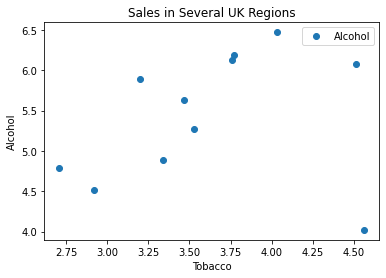

In [21]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East_Midlands 4.89 3.34
West_Midlands 5.63 3.47
East_Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern_Ireland 4.02 4.56'''

# Read in the data. Note that for Python 2.x,
# you have to change the "import" statement

from io import StringIO
df = pd.read_csv(StringIO(data_str), sep=r'\s+')

# Plot the data
df.plot('Tobacco', 'Alcohol', style='o')
plt.ylabel('Alcohol')
plt.title('Sales in Several UK Regions')
plt.show()

In [22]:
result = sm.ols('Alcohol ~ Tobacco', df[:-1]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Thu, 15 Sep 2022   Prob (F-statistic):            0.00723
Time:                        10:12:25   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0412      1.001      2.038      0.0

C:\Users\SAGAR\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
N = result.nobs
SSR = result.ssr
s2 = SSR / N
L = (1.0/np.sqrt(2*np.pi*s2)) ** N*np.exp(-SSR/(s2*2.0))
print('ln(L) =', np.log( L ))

ln(L) = -4.999758697385978


In [24]:
result.params

Intercept    2.041223
Tobacco      1.005896
dtype: float64

In [25]:
df['Ones'] = np.ones( len(df) )
Y = df.Alcohol[:-1]
X = df[['Tobacco','Ones']][:-1]

X = df.Tobacco[:-1]

# add a column of ones for the constant intercept term
X = np.vstack(( np.ones(X.size), X ))

# convert the numpy array to a matrix
X = np.matrix( X )

# perform the matrix multiplication,
# and then take the inverse
C = np.linalg.inv( X * X.T )

# multiply by the mean squared error of the residual
C *= result.mse_resid

# take the square root
SE = np.sqrt(C)

print(SE)

[[1.001   nan]
 [  nan 0.281]]


C:\Users\SAGAR\AppData\Local\Temp\ipykernel_11216\3558088937.py:21: RuntimeWarning: invalid value encountered in sqrt
  SE = np.sqrt(C)


In [26]:
i = 1
beta = result.params[i]
se = SE[i,i]
t = beta / se
print('t =', t)

t = 3.575608454239008


In [27]:
N = result.nobs
k = result.df_model + 1
dof = N - k
p_onesided = 1.0 - stats.t( dof ).cdf( t )
p = p_onesided * 2.0
print('p = {0:.3f}'.format(p))

p = 0.007


In [28]:
i = 0

# the estimated coefficient, and its variance
beta, c = result.params[i], SE[i,i]

# critical value of the t-statistic
N = result.nobs
P = result.df_model
dof = N - P - 1
z = stats.t( dof ).ppf(0.975)

# the confidence interval
print(beta - z * c, beta + z * c)

-0.26791770937100345 4.350363883047427


In [29]:
d = Y - result.fittedvalues

S = np.mean( d**3.0 ) / np.mean( d**2.0 )**(3.0/2.0)

# equivalent to:
# S = stats.skew(result.resid, bias=True)

K = np.mean( d**4.0 ) / np.mean( d**2.0 )**(4.0/2.0)

# equivalent to:
# K = stats.kurtosis(result.resid,fisher=False,bias=True)
print('Skewness: {:.3f}, Kurtosis: {:.3f}'.format(S,K))

Skewness: -0.014, Kurtosis: 1.527


In [30]:
(K2, p) = stats.normaltest(result.resid)
print('Omnibus: {0:.3f}, p = {1:.3f}'.format(K2, p))

Omnibus: 2.542, p = 0.281


C:\Users\SAGAR\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [33]:
DW = np.sum( np.diff( result.resid.values )**2.0 )
print('Durbin-Watson: {:.5f}'.format( DW ))

Durbin-Watson: 3.14371


In [34]:
JB = (N/6.0) * ( S**2.0 + (1.0/4.0)*( K - 3.0 )**2.0 )
p = 1.0 - stats.chi2(2).cdf(JB)
print('JB-statistic: {:.5f}, p-value: {:.5f}'.format( JB, p ))

JB-statistic: 0.90421, p-value: 0.63629


In [35]:
X = np.matrix( X )
EV = np.linalg.eig( X * X.T )
print(EV)

(array([  0.184, 136.515]), matrix([[-0.963, -0.268],
        [ 0.268, -0.963]]))


In [36]:
CN = np.sqrt( EV[0].max() / EV[0].min() )
print('Condition No.: {:.5f}'.format( CN ))

Condition No.: 27.22887


In [37]:
X = df[['Tobacco','Ones']]
Y = df.Alcohol
result = sm.OLS( Y, X ).fit()
result.summary()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'